<a href="https://colab.research.google.com/github/vidyaana22/portofolio-dataanalyst/blob/main/Information%20Retrieval%20(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link dataset: https://www.kaggle.com/datasets/heeraldedhia/us-economic-news-articles/data

# **Import Data**

In [ ]:
import pandas as pd
df = pd.read_csv('economic.csv', encoding = 'ISO-8859-1')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,article_id,date,headline,text
0,842613455,False,finalized,3,12/5/2015 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/1991,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/2015 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/2007,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/2015 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/1991,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/2015 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/1986,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/2015 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/2002,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


In [ ]:
df = df['text']

# **Preprocessing Data**

In [ ]:
import numpy as np
df = df.replace({None: np.nan})
df.dropna(inplace=True)
df = df.astype(str)

In [ ]:
import re
from bs4 import BeautifulSoup
import unicodedata

# General preprocessing
def general_prep(text):
    text = text.strip().lower()   # Case folding & trimming whitespace di awal dan akhir
    text = unicodedata.normalize('NFKD', text) # Ubah styled text menjadi biasa
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Hapus URLs
    return text

# Non-ASCII elements
def del_nonascii(text):
    return ''.join(char for char in text if ord(char) < 128)

# Emoticon handler
def del_emoticons(text):
    emoticon_ranges = [
        '\U0001F600-\U0001F64F', '\U0001F300-\U0001F5FF', '\U0001F680-\U0001F6FF',
        '\U0001F700-\U0001F77F', '\U0001F780-\U0001F7FF', '\U0001F800-\U0001F8FF',
        '\U0001F900-\U0001F9FF', '\U0001FA00-\U0001FA6F', '\U0001FA70-\U0001FAFF',
        '\U0001FB00-\U0001FBFF', '\U0001FC00-\U0001FCFF', '\U0001FD00-\U0001FDFF',
        '\U0001FE00-\U0001FEFF', '\U0001FF00-\U0001FFFF']

    emoticon_pattern = r'[' + '|'.join(emoticon_ranges) + ']+'
    return re.sub(emoticon_pattern, '', text)

# Twitter elements
def twitter_prep(text):
    text = re.sub(r'#\w+', '', text)   # Hapus hashtags
    text = re.sub(r'@\w+', '', text)   # Hapus mentions

# Hapus tag
def del_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Hapus isi teks di dalam kurung siku
def del_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Final elements preprocessing
def final_prep(text, remove_digits=False):
    text = text.replace("\n", " ")   # Menggantikan \n dengan spasi

    # Hapus simbol
    if remove_digits:
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)   # Kalau True, hapus angka juga
    else:
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    text = re.sub(' +', ' ', text)   # Menghapus repetitive spaces
    return text

# Penyatuan fungsi prepro yang diperlukan
def prepo(text):
    text = general_prep(text)
    text = del_nonascii(text)
    text = del_emoticons(text)
    text = del_html_tags(text)
    text = del_between_square_brackets(text)
    text = final_prep(text)
    return text

# Apply function
df = df.apply(prepo)

<ipython-input-53-7920cd7e801d>:35: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
df.head()

0    new york yields on most certificates of deposi...
1    the wall street journal onlinethe morning brie...
2    washington in an effort to achieve banking ref...
3    the statistics on the enormous costs of employ...
4    new york indecision marked the dollar s tone a...
Name: text, dtype: object

## **Slang**

In [ ]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}
slangword = pd.DataFrame(list(abbreviations.items()), columns=['slang', 'formal'])
slangword.to_csv('slangword.csv', index=False)

In [ ]:
slangword = pd.read_csv('slangword.csv')

def replace_slang_word(doc, slang_word):
    words = doc.split()
    new_words = []

    for word in words:
        if word in slang_word['slang'].values:
            formal = slang_word[slang_word['slang'] == word]['formal'].values
            if len(formal) == 1:
                new_words.append(formal[0])
            else:
                new_words.append(word)
        else:
            new_words.append(word)

    return ' '.join(new_words)

# Assuming 'text' is a list containing your text
df = df.apply(lambda doc: replace_slang_word(doc, slangword))

In [ ]:
df.head()

0    new york yields on most certificates of deposi...
1    the wall street journal onlinethe morning brie...
2    washington in an effort to achieve banking ref...
3    the statistics on the enormous costs of employ...
4    new york indecision marked the dollar s tone a...
Name: text, dtype: object

## **Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords

stopwords_list = set(stopwords.words('english'))

#removing the stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [t for t in tokens if t not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Apply function
df = df.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head()

0    new york yields certificates deposit offered m...
1    wall street journal onlinethe morning brief lo...
2    washington effort achieve banking reform senat...
3    statistics enormous costs employee drug abuse ...
4    new york indecision marked dollar tone traders...
Name: text, dtype: object

## **Stemming**

In [ ]:
from nltk.stem.snowball import SnowballStemmer

def snowball_stemmer(text):
    stemmer = SnowballStemmer('english')
    text= ' '.join([stemmer.stem(word) for word in text.split()])
    return text

#Apply function on review column
df = df.apply(snowball_stemmer)

In [ ]:
df.head()

0    new york yield certif deposit offer major bank...
1    wall street journal onlineth morn brief look d...
2    washington effort achiev bank reform senat neg...
3    statist enorm cost employe drug abus well know...
4    new york indecis mark dollar tone trader paus ...
Name: text, dtype: object

# **Visualisasi Hasil Preprocessing**

In [ ]:
tx = df
from nltk.tokenize import word_tokenize
tokens = []
for text in tx:
    tokens.extend(word_tokenize(text))

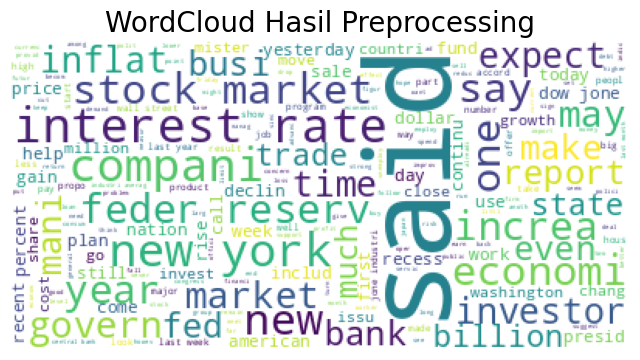

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

token = ' '.join(tokens)
wordcloud = WordCloud(background_color = "white").generate(token)

#Plot the wordcloud
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)

#To remove the axis value
plt.axis("off")
plt.title('WordCloud Hasil Preprocessing', fontsize=20)
plt.show()

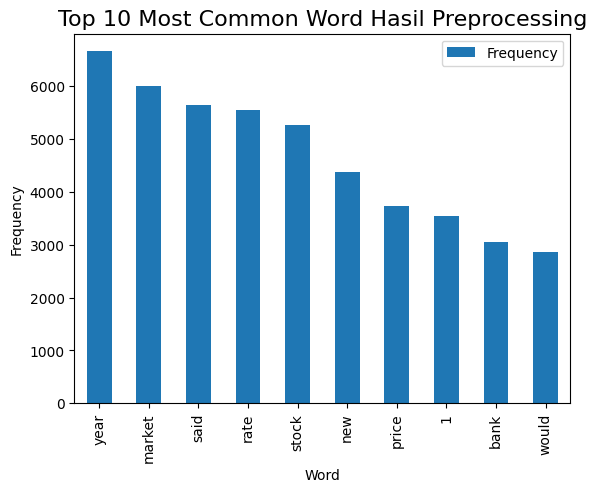

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(tokens)
fdistc = fdist.most_common(10)

df_freq_tokens = pd.DataFrame.from_dict(dict(fdistc), orient = 'index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'
df_freq_tokens.plot(kind = 'bar')

plt.title('Top 10 Most Common Word Hasil Preprocessing', fontsize = 16)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dfl = df.values.tolist()
dfl

['new york yield certif deposit offer major bank drop tenth percentag point latest week reflect overal declin short term interest rate small denomin consum cds sold direct bank averag yield six month deposit fell 5 49 5 62 week end yesterday accord 18 bank survey banxquot money market wilmington del inform servic three month consum deposit averag yield sank 5 29 5 42 week accord banxquot two bank banxquot survey citibank new york corest pennsylvania pay less 5 threemonth small denomin cds declin somewhat smaller five year consum cds eas 7 37 7 45 banxquot said yield three month six month treasuri bill sold monday auction plummet fifth percentag point previous week 5 46 5 63 respect',
 'wall street journal onlineth morn brief look day biggest news email subscrib 7 everi busi day sign e mail friday even congress town summer recess american head mid august weekend bush administr sent messag state feder govern make tougher nation children insur program cover offspr middl incom famili state

# **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

corpus = dfl
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

query = 'new york'
query_vec = vectorizer.transform([query])

results = cosine_similarity(X, query_vec).reshape((-1))
top5_indices = results.argsort()[::-1][:5]

data = {'Document': [corpus[i] for i in top5_indices], 'Score': [results[i] for i in top5_indices]}
df_results = pd.DataFrame(data)

print(df_results)

                          Document     Score
0                new york may 2 ap  0.500018
1                new york may 5 tf  0.323126
2          new york oct 19 ap eeuo  0.315970
3  new york dec 30 ap eeuoth stock  0.314453
4        new york aug 19 ap eeuoth  0.310325


# **CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

corpus = dfl

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

query = 'new york profit'
query_vec = vectorizer.transform([query])

results = cosine_similarity(X, query_vec).reshape((-1))

top5_indices = results.argsort()[::-1][:5]

data = {'Document': [corpus[i] for i in top5_indices], 'Score': [results[i] for i in top5_indices]}
df_results = pd.DataFrame(data)

print(df_results)

                  Document    Score
0  new york april 21eeuoth  0.57735
1        new york may 2 ap  0.57735
2   new york may 20eeuothc  0.57735
3        new york may 5 tf  0.57735
4    new york jan 29eeuowa  0.57735


# **Word2Vec**

In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

corpus = df.apply(lambda x: x.split())

word2vec_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

document_embeddings = [
    sum(word2vec_model.wv[word] for word in doc) / len(doc)
    if len(doc) > 0 and all(word in word2vec_model.wv for word in doc)
    else [0] * 100
    for doc in corpus
]

query = 'washington profit'
query_embedding = (
    sum(word2vec_model.wv[word] for word in query.split()) / len(query.split())
    if len(query.split()) > 0 and all(word in word2vec_model.wv for word in query.split())
    else [0] * 100
)

similarities = cosine_similarity([query_embedding], document_embeddings)[0]

top5_indices = similarities.argsort()[::-1][:5]
data = {'Dokumen': [df.iloc[i] for i in top5_indices], 'Skor': [similarities[i] for i in top5_indices]}
df_hasil = pd.DataFrame(data)
print(df_hasil)

                                             Dokumen      Skor
0  bid adieu grow profit slow economi china incre...  0.899287
1  mattel inc nationeeua second largest toy maker...  0.883523
2  fire oil gas well mexico could burn week said ...  0.868962
3  unit parcel servic inc first quarter profit ju...  0.868574
4  economi struggl corpor third way second quarte...  0.865591


# **FastText**

In [ ]:
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

corpus = dfl

fasttext_model = FastText(sentences=[doc.split() for doc in corpus], vector_size=100, window=5, min_count=1, workers=4)
document_embeddings = [fasttext_model.wv[doc.split()].mean(axis=0) if len(doc.split()) > 0 else np.zeros(100) for doc in corpus]

query = 'new york market'
query_embedding = fasttext_model.wv[query.split()].mean(axis=0) if len(query.split()) > 0 else np.zeros(100)

similarities = cosine_similarity([query_embedding], document_embeddings)[0]

top5_indices = similarities.argsort()[::-1][:5]
data = {'Dokumen': [corpus[i] for i in top5_indices], 'Skor': [similarities[i] for i in top5_indices]}
df_hasil = pd.DataFrame(data)
print(df_hasil)

                                     Dokumen      Skor
0  new york april 18eeuoth stock market haul  0.937364
1                     new york may 20eeuothc  0.933955
2                    new york april 21eeuoth  0.908296
3     new york nov 23 ap eeuoth stock market  0.903970
4   new york march 18 eec stock market stage  0.902629
